In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
import pandas as pd

filepath = 'C:/AI_study/dataset/'
# Load all 9 files as a list
filenames = [
    'S01R01.txt', 'S01R02.txt', 'S02R01.txt', 'S02R02.txt', 'S03R01.txt', 'S03R02.txt',
    'S03R03.txt', 'S04R01.txt', 'S05R01.txt', 'S05R02.txt', 'S06R01.txt', 'S06R02.txt',
    'S07R02.txt', 'S08R01.txt', 'S09R01.txt', 'S10R01.txt'
]

# Create an empty list to store DataFrames
dfs = []

# Iterate over each filename, load the CSV file, and append the DataFrame to the list
for filename in filenames:
    df = pd.read_csv(filepath + filename, sep="\s+", header=None)
    user_number = int(filename[1:3])
    df['User_Number'] = user_number
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Set column names
columns = "TS, Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number".split(",")
df.columns = columns

print(df)

              TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
0             15        70       39     -970        0        0        0   
1             31        70       39     -970        0        0        0   
2             46        60       49     -960        0        0        0   
3             62        60       49     -960        0        0        0   
4             78        50       39     -960        0        0        0   
...          ...       ...      ...      ...      ...      ...      ...   
1798357  3020296      -131      107     -960        0        0        0   
1798358  3020312      -121      127     -970        0        0        0   
1798359  3020328      -141      117     -960        0        0        0   
1798360  3020343      -131      127     -980        0        0        0   
1798361  3020359      -141        0        0        0        0        0   

         Trunk_1  Trunk_2  Trunk_3  status  User_Number  
0              0        0        0       

In [3]:
df.head()

,TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number
0,15,70,39,-970,0,0,0,0,0,0,0,1
1,31,70,39,-970,0,0,0,0,0,0,0,1
2,46,60,49,-960,0,0,0,0,0,0,0,1
3,62,60,49,-960,0,0,0,0,0,0,0,1
4,78,50,39,-960,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798362 entries, 0 to 1798361
Data columns (total 12 columns):
 #   Column       Dtype
---  ------       -----
 0   TS           int64
 1    Ankel_1     int64
 2   Ankel_2      int64
 3   Ankel_3      int64
 4   Thigh_1      int64
 5   Thigh_2      int64
 6   Thigh_3      int64
 7   Trunk_1      int64
 8   Trunk_2      int64
 9   Trunk_3      int64
 10  status       int64
 11  User_Number  int64
dtypes: int64(12)
memory usage: 164.6 MB


In [5]:
df.describe()

,TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number
count,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06,1.798362e+06
mean,1.077208e+06,-5.840035e+01,8.205787e+02,5.888554e+01,-2.079832e+01,6.020473e+02,-3.875299e+01,4.821141e+01,7.631992e+02,-1.167351e+02,6.525399e-01,5.211849e+00
std,7.637586e+05,5.273884e+02,4.954709e+02,5.610358e+02,5.378507e+02,4.358368e+02,4.883318e+02,2.827634e+02,4.226899e+02,4.159825e+02,5.879011e-01,2.897030e+00
min,1.500000e+01,-3.123400e+04,-3.276300e+04,-3.148800e+04,-2.184600e+04,-2.967300e+04,-2.431800e+04,-4.621000e+03,-3.400000e+03,-4.786000e+03,0.000000e+00,1.000000e+00
25%,4.390620e+05,-2.220000e+02,7.450000e+02,6.900000e+01,-2.630000e+02,2.590000e+02,-1.010000e+02,-8.700000e+01,7.800000e+02,-2.030000e+02,0.000000e+00,3.000000e+00
50%,9.293750e+05,-3.000000e+01,9.700000e+02,2.170000e+02,-1.800000e+01,6.290000e+02,9.000000e+01,2.900000e+01,9.520000e+02,-3.800000e+01,1.000000e+00,5.000000e+00
75%,1.621328e+06,1.210000e+02,1.019000e+03,3.260000e+02,2.180000e+02,9.620000e+02,2.420000e+02,1.940000e+02,1.009000e+03,1.160000e+02,1.000000e+00,8.000000e+00
max,3.058390e+06,3.072500e+04,3.200200e+04,3.174400e+04,2.662500e+04,3.259800e+04,2.841800e+04,6.707000e+03,2.429800e+04,4.339000e+03,2.000000e+00,1.000000e+01


In [6]:
df.columns

Index(['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3', 'status', 'User_Number'],
      dtype='object')

In [7]:
df['status'].value_counts()

status
1    959685
0    731768
2    106909
Name: count, dtype: int64

In [8]:
df.shape

(1798362, 12)

In [9]:
# status 열에서 값이 0인 행 제거
df = df[df['status'] != 0]

# status 열에서 값이 1인 행을 0으로, 값이 2인 행을 1로 바꾸기
df['status'] = df['status'].replace({1: 0, 2: 1})

In [10]:
df['status'].value_counts()

status
0    959685
1    106909
Name: count, dtype: int64

In [11]:
df.shape

(1066594, 12)

I:\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
I:\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


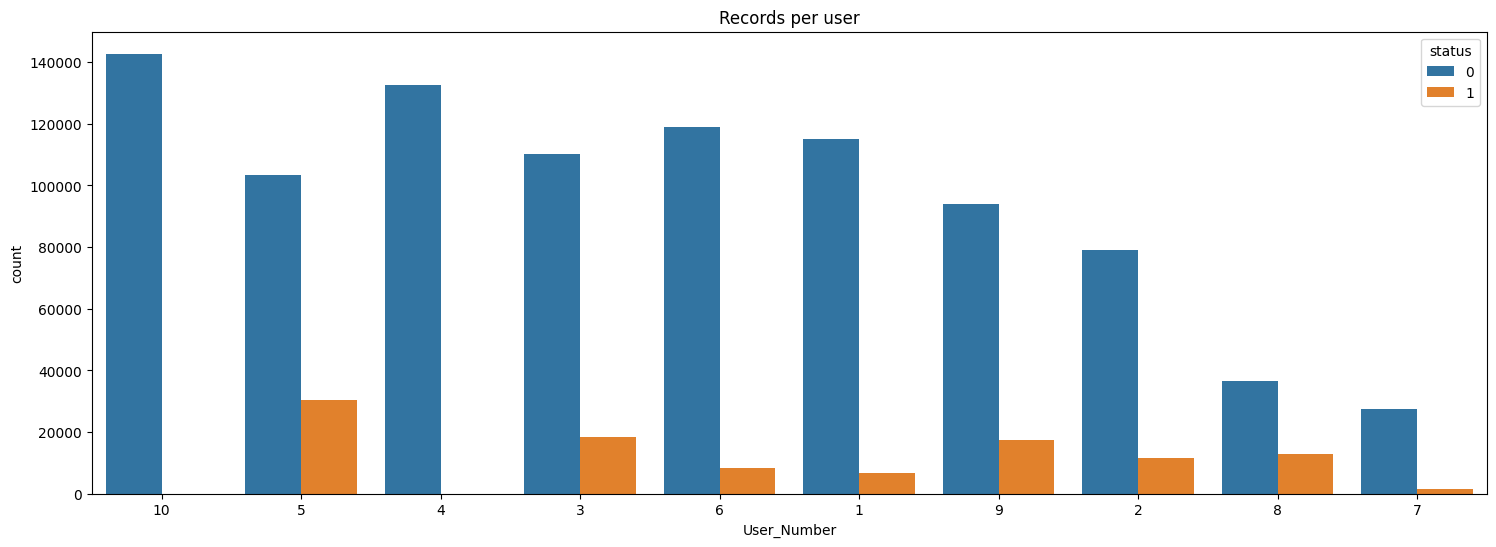

In [12]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "User_Number", hue="status", data = df,
              order = df.User_Number.value_counts().index)
plt.title("Records per user");

In [13]:
X = df[['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3']].values
y = df['status'].values.reshape(-1, 1)

In [14]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(682620, 10) (682620, 1)
(213319, 10) (213319, 1)


In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [16]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]

## 데이터 밸런싱 전 모델

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Flatten())
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val_hot), shuffle=True)

Epoch 1/10
5333/5333 [==============================] - 11s 2ms/step - loss: 442.4908 - accuracy: 0.8688 - val_loss: 385.3275 - val_accuracy: 0.8986
Epoch 2/10
5333/5333 [==============================] - 11s 2ms/step - loss: 284.1775 - accuracy: 0.8703 - val_loss: 269.0426 - val_accuracy: 0.8981
Epoch 3/10
5333/5333 [==============================] - 11s 2ms/step - loss: 272.3516 - accuracy: 0.8715 - val_loss: 273.5992 - val_accuracy: 0.8976
Epoch 4/10
5333/5333 [==============================] - 11s 2ms/step - loss: 256.2148 - accuracy: 0.8686 - val_loss: 83.7048 - val_accuracy: 0.8771
Epoch 5/10
5333/5333 [==============================] - 11s 2ms/step - loss: 247.0969 - accuracy: 0.8712 - val_loss: 116.5310 - val_accuracy: 0.8837
Epoch 6/10
5333/5333 [==============================] - 11s 2ms/step - loss: 214.3581 - accuracy: 0.8724 - val_loss: 286.8391 - val_accuracy: 0.8997
Epoch 7/10
5333/5333 [==============================] - 11s 2ms/step - loss: 194.9280 - accuracy: 0.8723 - 

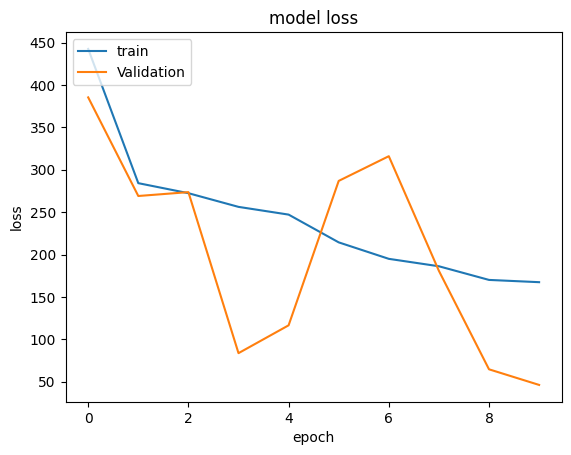

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

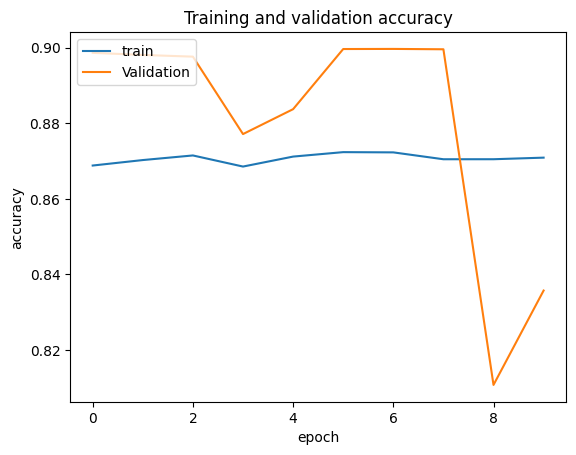

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

6667/6667 [==============================] - 5s 666us/step
f1_score =  0.8482013068808109
0.8544620966721201
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    191937
           1       0.23      0.19      0.20     21382

    accuracy                           0.85    213319
   macro avg       0.57      0.56      0.56    213319
weighted avg       0.84      0.85      0.85    213319



<Axes: >

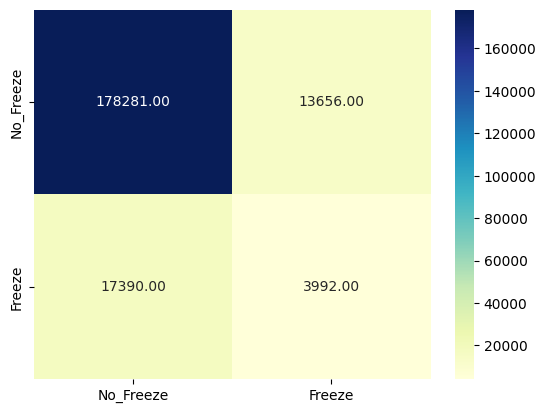

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

## RandomUnderSampler를 통해 데이터 밸런싱

In [22]:
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(df.drop('status', axis=1), df['status'])

In [23]:
df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('status', axis=1).columns),
                         pd.DataFrame({'status': y_resampled})], axis=1)

In [24]:
print(df['status'].value_counts())

status
0    106909
1    106909
Name: count, dtype: int64


In [25]:
df.head()

,TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,User_Number,status
1178539,2385156,-484,833,386,-945,-27,-161,-87,1019,-29,6,0
1503549,1106281,303,980,138,-563,453,676,-174,971,233,9,0
1221997,318765,535,990,396,318,722,656,398,923,-184,6,0
1262699,263687,151,1009,99,27,981,171,29,1019,-29,7,0
803915,2881171,-202,1352,29,436,1101,30,19,1104,-97,4,0


I:\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
I:\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


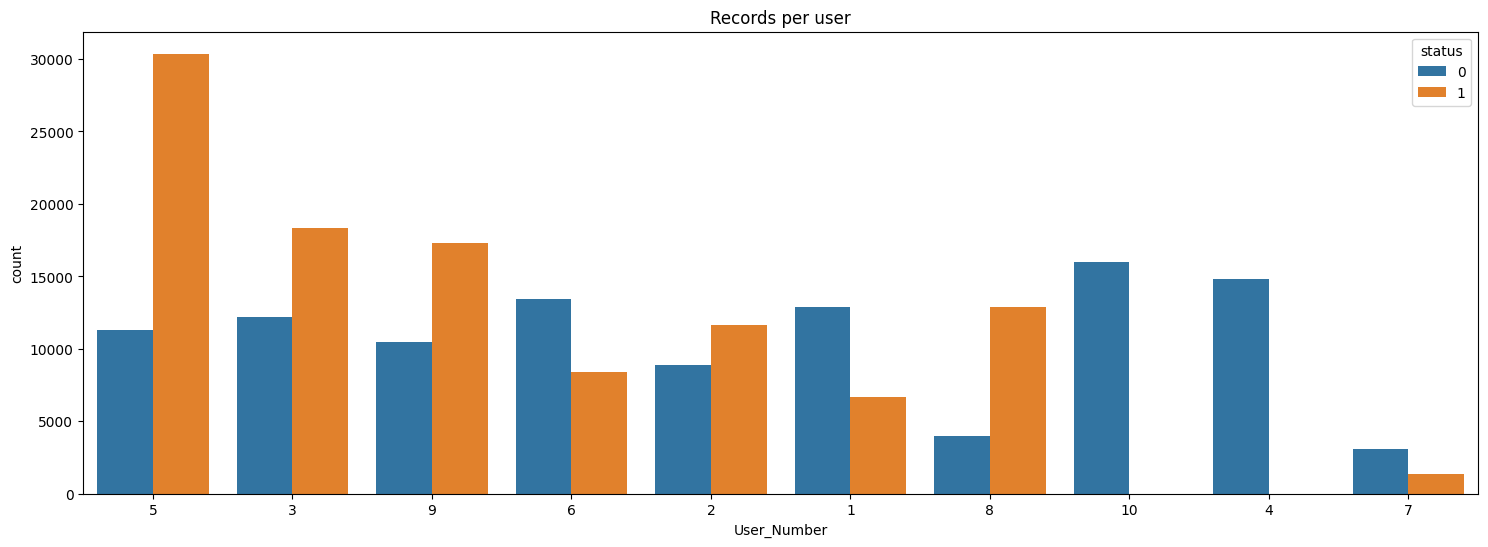

In [26]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "User_Number", hue="status", data = df,
              order = df.User_Number.value_counts().index)
plt.title("Records per user");

In [27]:
X = df[['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3']].values
y = df['status'].values.reshape(-1, 1)

In [28]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(136843, 10) (136843, 1)
(42764, 10) (42764, 1)


In [29]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [30]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]

In [31]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Flatten())
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                550       
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [32]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val_hot), shuffle=True)

Epoch 1/10
1070/1070 [==============================] - 3s 2ms/step - loss: 1603.8551 - accuracy: 0.5673 - val_loss: 268.0805 - val_accuracy: 0.6324
Epoch 2/10
1070/1070 [==============================] - 2s 2ms/step - loss: 227.8359 - accuracy: 0.5891 - val_loss: 175.1712 - val_accuracy: 0.5447
Epoch 3/10
1070/1070 [==============================] - 2s 2ms/step - loss: 212.9419 - accuracy: 0.5960 - val_loss: 83.7544 - val_accuracy: 0.6411
Epoch 4/10
1070/1070 [==============================] - 2s 2ms/step - loss: 201.8544 - accuracy: 0.6043 - val_loss: 307.0111 - val_accuracy: 0.6843
Epoch 5/10
1070/1070 [==============================] - 2s 2ms/step - loss: 209.3968 - accuracy: 0.6069 - val_loss: 163.1159 - val_accuracy: 0.5495
Epoch 6/10
1070/1070 [==============================] - 2s 2ms/step - loss: 215.1467 - accuracy: 0.6080 - val_loss: 165.0067 - val_accuracy: 0.5251
Epoch 7/10
1070/1070 [==============================] - 2s 2ms/step - loss: 199.5570 - accuracy: 0.6084 - val_lo

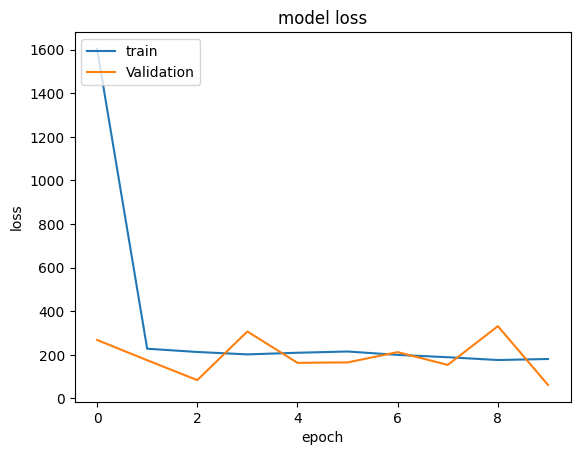

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

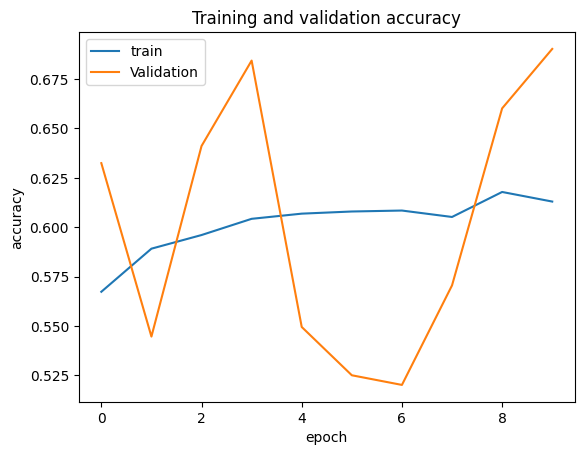

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

1337/1337 [==============================] - 1s 674us/step
f1_score =  0.6876439774884022
0.6958656814142737
              precision    recall  f1-score   support

           0       0.79      0.53      0.64     21382
           1       0.65      0.86      0.74     21382

    accuracy                           0.70     42764
   macro avg       0.72      0.70      0.69     42764
weighted avg       0.72      0.70      0.69     42764



<Axes: >

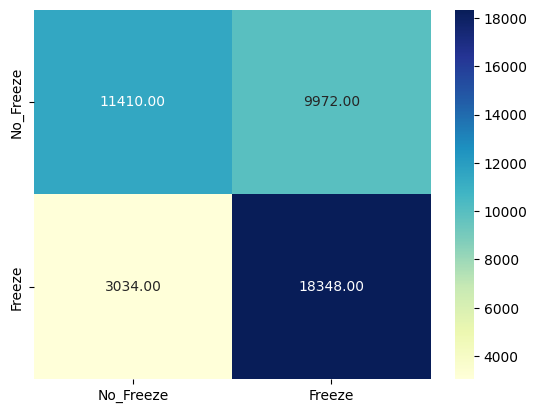

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')